In [47]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
import numpy as np

## Load the dataset:

In [2]:
penguins = sn.load_dataset('penguins')
penguins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [25]:
penguins.describe(exclude='number')

,species,island,sex
count,344,344,333
unique,3,3,2
top,Adelie,Biscoe,Male
freq,152,168,168


In [3]:
#fill empty cells (mean for numric, most frequent for categorical):

penguins['bill_length_mm'] = penguins['bill_length_mm'].fillna(penguins['bill_length_mm'].mean(),)
penguins['bill_depth_mm'] = penguins['bill_depth_mm'].fillna(penguins['bill_depth_mm'].mean())
penguins['body_mass_g'] = penguins['body_mass_g'].fillna(penguins['body_mass_g'].mean())
penguins['flipper_length_mm'] = penguins['flipper_length_mm'].fillna(penguins['flipper_length_mm'].mean())
penguins['sex'] = penguins['sex'].fillna(penguins['sex'].value_counts().index[0])
penguins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     344 non-null    float64
 3   bill_depth_mm      344 non-null    float64
 4   flipper_length_mm  344 non-null    float64
 5   body_mass_g        344 non-null    float64
 6   sex                344 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [9]:
#change categorical to numric:
encoder = preprocessing.LabelEncoder()
penguins['sex'] = encoder.fit_transform(penguins['sex'])
penguins['species'] = encoder.fit_transform(penguins['species'])
penguins['island'] = encoder.fit_transform(penguins['island'])
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,0,2,39.10000,18.70000,181.000000,3750.000000,1
1,0,2,39.50000,17.40000,186.000000,3800.000000,0
2,0,2,40.30000,18.00000,195.000000,3250.000000,0
3,0,2,43.92193,17.15117,200.915205,4201.754386,1
4,0,2,36.70000,19.30000,193.000000,3450.000000,0


## Draw pairplot to see the relations:

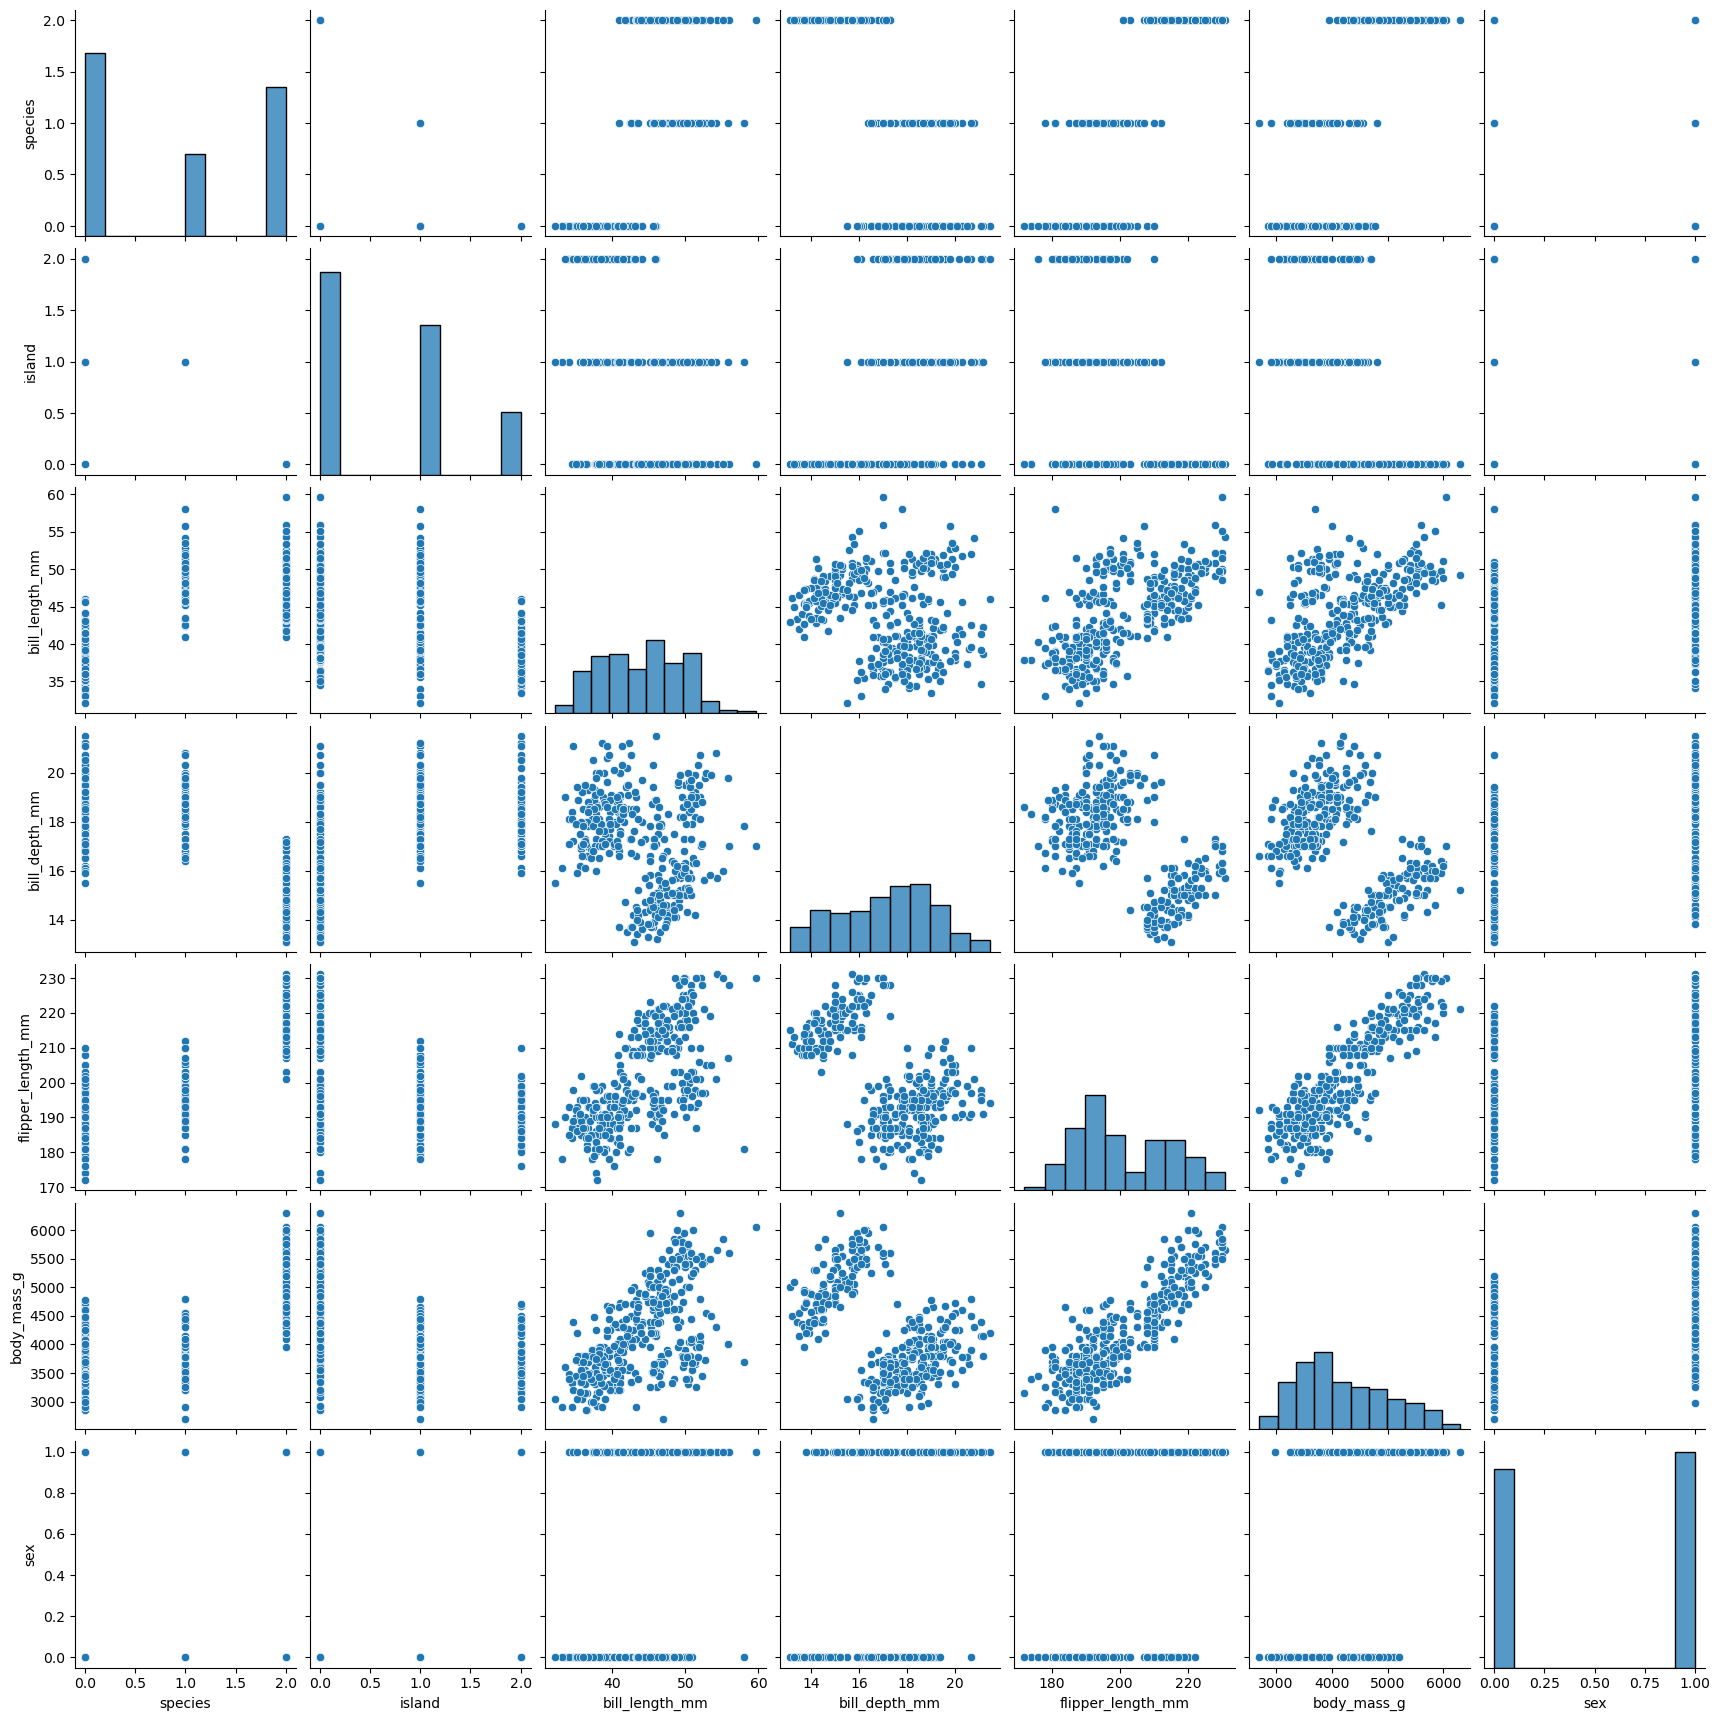

In [41]:
#draw a chart:
sn.pairplot(penguins)
plt.show()

insights:
- It has no linear relation between spieces and other columns.
- It can use logistic Regression for classification.

## Start Logistic Regression model:

steps:
- split the data to train and test parts.
- standraization the x_train, x_test.
- train the model.
- evaluate the model

In [12]:
# split data to training and test:
x = penguins.drop(columns={'species'})
y = penguins['species']

x_train, x_test, y_train, y_test = train_test_split(x ,y ,test_size=0.3 ,random_state=23 )
print(f'train size: {x_train.shape} -- test size: {x_test.shape}')

train size: (240, 6) -- test size: (104, 6)


In [14]:
# standraize the values:
standrd = StandardScaler()
# it must start fit for the train part, and the test part transform by it.
x_train_std = standrd.fit_transform(x_train)
x_test_std = standrd.transform(x_test)

In [33]:
# train the model:
model_train = LogisticRegression(C=100)

model_train.fit(x_train_std,y_train)

LogisticRegression(C=100)

In [24]:
# test the model:
y_pred = model_train.predict(x_test_std)
print(f'{y_pred} \n Accuracy score: {accuracy_score(y_test, y_pred)}')

[0 0 0 1 2 2 1 1 0 2 2 2 2 2 1 2 0 2 0 0 1 0 2 2 0 0 0 2 0 1 0 2 2 0 0 2 2
 2 2 0 1 0 2 0 0 2 1 2 1 2 0 2 2 2 0 1 0 1 2 0 2 2 0 1 2 2 2 0 0 0 0 0 2 2
 2 2 2 0 2 0 0 2 1 0 1 2 0 0 1 0 2 0 0 2 2 2 0 0 0 1 2 0 2 0] 
 Accuracy score: 1.0


## Compare between logistic regression models based on C:

In [76]:
''' change 'C' in LogisticRegression:
It's a hyperparameter that controls the trade-off between the model's complexity and its ability to fit the training data. 
When 'C' is high, the model will try to fit the training data as closely as possible, which can lead to overfitting. 
On the other hand, when 'C' is low, the model will try to find a simpler solution, which can lead to underfitting.
'''
c = np.arange(0.001, 111, 10)
score = []
w = []

for i in c:
    # train:
    test_c_model = LogisticRegression(C=i)
    test_c_model.fit(x_train_std, y_train)
    # test:
    y_c_pred = test_c_model.predict(x_test_std)
    accuracy = accuracy_score(y_test, y_c_pred)
    score.append(accuracy)
    w.append(np.linalg.norm(test_c_model.coef_))
    

print('Done trainig')

Done trainig


In [77]:
# create Dataframe that hold all results:
weight_avg = []
for i in range(len(c)):
    weight_avg.append( np.average(w[i]) )

df_compare = pd.DataFrame({'C' : c, 'score' : score, 'weight' : weight_avg})

## draw the charts:

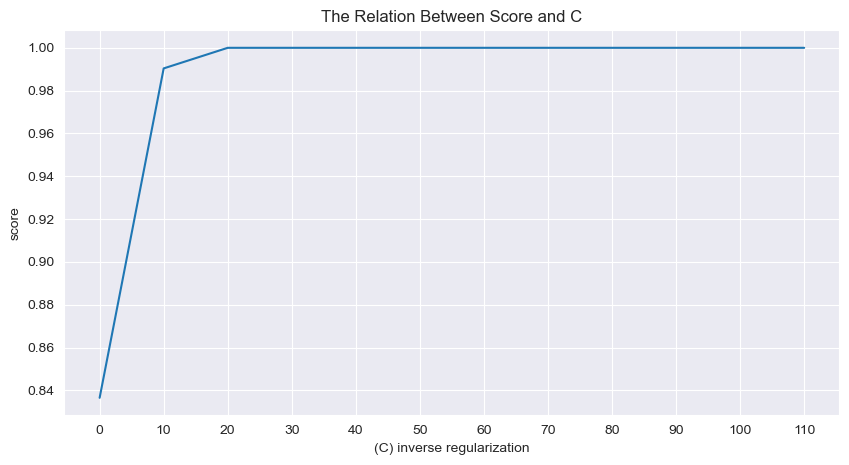

In [102]:

# relation between score and c (inverse regularization):
sn.set_style('darkgrid')
plt.figure(figsize=(10,5))
sn.lineplot(data=df_compare, x='C', y='score')
plt.xticks(c)
plt.title('The Relation Between Score and C')
plt.xlabel('(C) inverse regularization')
plt.show()

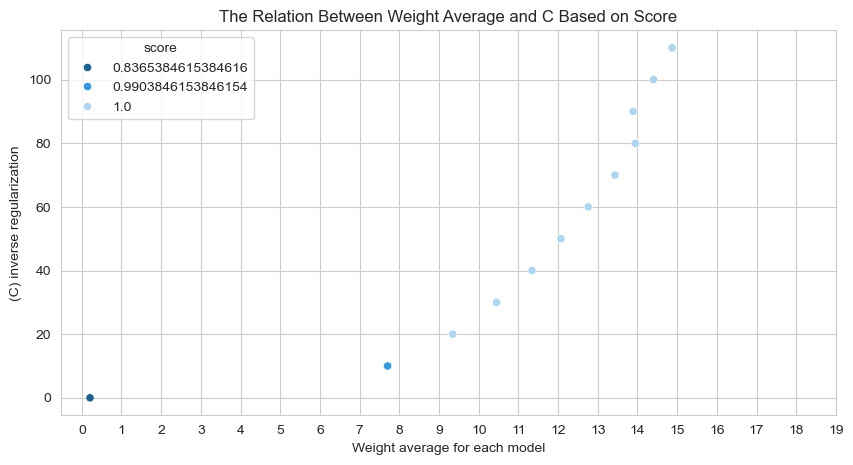

In [101]:
# relation between score and c (inverse regularization):
sn.set_style('whitegrid')
plt.figure(figsize=(10,5))
sn.scatterplot(data=df_compare, x='weight', y='C', hue='score', palette=['#1f618d', '#3498db', '#aed6f1'])
plt.xticks(np.arange(0,20,1))
plt.title('The Relation Between Weight Average and C Based on Score')
plt.xlabel('Weight average for each model')
plt.ylabel('(C) inverse regularization')
plt.show()